This notebook is part of the [Machine Learning class](https://github.com/erachelson/MLclass) by [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en).

This notebook is joint work by Luca Mossina, Erwan Lecarpentier and Emmanuel Rachelson.

License: CC-BY-SA-NC.

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">SVMs (practice session)</div>

# Introduction

SVMs is a classical Supervized Learning technique.

TODO blabla

Content:
1. [Linear SVMs](#sec1)<br>
1.1 [Let's play](#subsec11)<br>
1.2 [Tune your linear SVM](#subsec12)
2. [SVM with kernels](#sec2)<br>
2.1 [Warm-up: Americans and Atheism  (OPTIONAL)](#subsec21)<br>
2.2 [Back to basics](#subsec22)<br>
2.3 [Kernels](#subsec23)
3. [Application](#sec3)

# <a id="sec1"></a> 1. Linear SVMs

The goal of this section is to explore the most basic form of SVM, namely the linear one. We are going to test this method on toy data set and to play with the hyperparameters in order to get the best classifier.

<div class="alert alert-warning">**Question 1.1**<br>
What is the objective of SVMs?<br>
On which principle is it built? Give a geometrical interpretation.
</div>

Your answer :

## <a id="subsec11"></a> 1.1 Let's play

Let's take a toy data set $\{ {x_i, y_i} \}_{i=1}^n$ where $x_i \in \mathbb{R}^2$ is a point and $y_i \in [-1, 1]$ a label.<br>
The code below allows you to load the data and to display it.

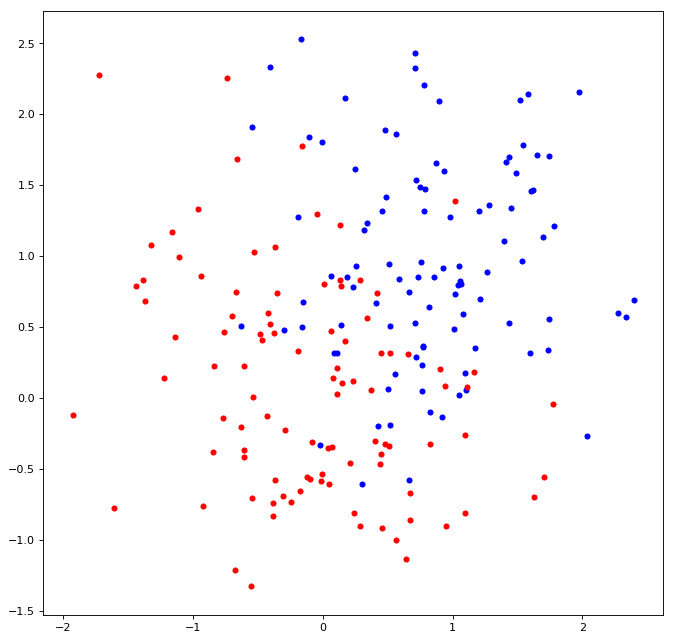

In [170]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def plot_data(name):
    fig_size=(10, 10)
    res = np.loadtxt(name, delimiter=',')
    X = res[:,0:-1]
    y = res[:,-1].astype(int)
    Xblue = X[y==-1]
    Xred = X[y==1]
    fig=plt.figure(figsize=fig_size, dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(Xblue[:,0],Xblue[:,1],c='b',s=20)
    plt.scatter(Xred[:,0],Xred[:,1],c='r',s=20)

plot_data("data1.csv")

<div class="alert alert-warning">**Question 1.2**<br>
Can this data set be separated by a straight line?<br>
What kind of technique could be used to train a classifier on this data set?
</div>

Your answer:

Let's apply the SVM method to this dataset. To this purpose, we are going to use scikit-learn, a Python library providing most of the common Machine Learning off the shelf methods including SVM. Their documentation page for this method can be found here: http://scikit-learn.org/stable/modules/svm.html

<div class="alert alert-warning">**Question 1.3**<br>
Use the class sklearn.svm.SVC provided in scikit-learn in order to train an SVM on the provided data.
</div>

In [138]:
### WRITE YOUR CODE HERE

#%load solutions/code1.py
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

<div class="alert alert-warning">**Question 1.4**<br>
In "Support Vector Machine", what are the "support vectors"?
</div>

Your answer :

## <a id="subsec12"></a> 1.2 Tune your linear SVM

One of the parameters of the class sklearn.svm.SVC is the penalty parameter $C$ of the error term. It quantifies the missmatch-tolerance that is allowed when fitting an SVM model to the data. The smaller, the bigger is the tolerance. In our case, having such a tolerance is necessary because the data cannot be separated by a straight line, thus some point have to be on the wrong side of the separating hyperplan.

$C$ is an hyperparameter, which means that it needs to be tuned for the algorithm to yield good results. This is a common concern in Machine Learning, as a result, techniques have been designed in order to select the best hyperparameters. The most common technique is probably the cross validation. Roughly it consists in:

    0) dividing the data set into training and test sets;

    1) selecting a value of the hyperparameters;

    2) train the model with the training set;

    3) test the model with the test set and compute a performance indicator;

    4) go back to 1) with another value of the hyperparameters.

When the procedure is finished, simply choose the hyperparameters yielding the best performance. We are now going to perform k-fold cross validation - which is a certain type of cross validation - on our problem, in order to identify the best value of $C$.
For more details, see the wikipedia article: https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation

For more details on the type of indicators used in step 3), see https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers<br>
The accuracy, refered to as ACC in the article, may be a good start.

<div class="alert alert-warning">**Question 1.5**<br>
Fill the code below in order to find the best value of the hyperparameter $C$.
</div>

In [141]:
C = [0.001, 0.01, 0.1, 1.0, 10, 42, 100, 1000] # Tested values of C
k = 10 # k-fold CV: number of subsets
n = int(len(X)/k) # length subsets

### WRITE YOUR CODE HERE

#%load solutions/code2.py
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

<div class="alert alert-warning">**Question 1.6**<br>
What is the best value of $C$ among the proposed ones?
</div>

Your answer :

# <a id="sec2"></a> 2. SVMs with kernels

In [173]:
# === imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import copy

%load_ext autoreload
%autoreload 2

## Binary Classification

The natural application of SVM methods is that of binary classification.

## <a id="subsec21"></a> 2.1 Warm-up: Americans and Atheism  (OPTIONAL)

**SCOPE**: warm-up, revise and challenge yourself with a simple example.
    - MAXIMUM TIME: 10 minutes, afterwards look at the proposed hints

Let us find out how americans tolerated atheists in 1976.
The dataset is described as follows:

```
Dataset:  atheist.dat
Source: E. Filsinger (1976). "Tolerance of Non-Believers: A Cross-Tabular  and Log Linear Analysis of Some Religious Correlates," Review of Religious  Research, Vol.17, #3, pp.232-240
Description: Church Attendance and Tolerance for Atheists for survey of 1221 people.

Variables/Columns 
Church Attendance  8  /* 1=Never, 2=Yearly, 3=Monthly, 4=Weekly */
Tolerance for Atheists  16 /* 1=Low, 2=High  */
```

#### 2.1.1 Retrieve and understand data

The file is available online at: http://users.stat.ufl.edu/~winner/datasets.html  

 - Find the corresponding file
 - save it in the 'data' directory
 - import it as a pandas dataframe. No cheating, it can be done with a pandas function.
 
Your dataframe should have 1221 rows and 2 columns, which you'll name respectively 'attendance', 'tolerance'.

In [175]:
# === Solution
data_file = 'data/atheist.dat'
df = pd.read_csv(data_file, sep='\s+',
                 header=None,
                 names=['attendance', 'tolerance'])

print(df.shape, "# <-- (nrow, ncols)", "\n")
print(df.sample(5)) # print random rows

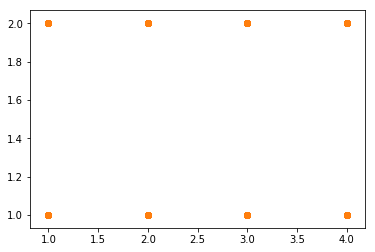

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df['attendance'], df['tolerance'])
plt.scatter(df['attendance'], df['tolerance'])

It doesn't look like the fancy figures we saw in class, does it?

#### 2.1.2 run SVM. Does it makes sense?

First of all, what can we learn having a strong look at the data and their description?  
Do we have categorical, binary, continuous data?

These are fundamental questions, which you'll ask yourselves for the rest of your (data science) life.
Often, collegues or clients have no idea about these formalities; they have a problem and they ask you to provide a good enough solution.

*Answer* : it looks like we could consider them as continuous. However, they were recorded on a step scale. [...]

Let the fun begin. We want to do SVM classification with scikit-learn, but we know nothing about its api's!  
Thou shalt fear no more, the word of the Doc is with us:
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

We are doing SVM classification, could it be: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC ?
Let us copy-paste the example at the bottom of the page. Run the following:

In [21]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, y)

NameError: name 'X' is not defined

Of course, ```'X' is not defined```.   
Let us take a moment to ponder on how to name things.  
For sure, "x" and "y" mean something to all those with scientific background.  
Often, however, when we do some ML modeling, we are having a data-dialogue with someone, ourselves included.  
Do the favor to the "you" of the future and use a meaningful description for the variables; code is mostly meant to be read.

In [31]:
attend = df['attendance'] # WARNING: you are passing a reference.
toler = df['tolerance']

# # See how dangerous things can get:
# print(attend[0:2])
# attend[0:2] = 666, 666
# print(df.iloc[0:2]) # original df is modified
# # alternatives:
# # import copy
# # attend = copy.deepcopy(df['attendance'])
# # all data is hard copied in new struct:
# # can be a problem, if data is bi

clf.fit(X = attend,
        y = toler) 

ValueError: Expected 2D array, got 1D array instead:
array=[666. 666.   1. ...   4.   4.   4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Something just went horribly wrong.  
He's telling us something about ```"Expected 2D array, got 1D array instead: [...]"```  
After some intense googling, stackoverflow.com gives us a hint:  
https://stackoverflow.com/questions/38657138/scikits-learn-svm-1-dimensional-separating-hyperplane

Let us add a dummy column of zeros:

In [82]:
df['zeros'] = 0 # dummy zeros

df  = df.sample(frac=1) # shuffle rows to avoid introducing bias
print(df.iloc[0:5,])

NTRAINS = 800 # out of 1221

tr = df.iloc[0:NTRAINS,:]
te = df.iloc[NTRAINS:,:]

# assert: make sure now rows were lost or doubled
assert tr.shape[0] + te.shape[0] == df.shape[0]

features = ['attendance', 'zeros']
attend = df[features]
toler  = df['tolerance']

from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5) # linear

clf.fit(X=attend[0:NTRAINS], y=toler[0:NTRAINS]) 

y_pred = clf.predict(attend[NTRAINS:])
y_test = toler[NTRAINS:].tolist()

errors = np.zeros(len(y_pred))

for i in range(len(errors)):
    if y_pred[i] != y_test[i]:
        errors[i] = 1
        
er_rate = np.sum(errors) / len(errors)
print("error rate:", er_rate)

     attendance  tolerance  zeros
82            1          2      0
249           2          2      0
180           2          2      0
833           3          1      0
567           2          1      0
error rate: 0.37292161520190026


*Campeones*, we made it, sklearn is no more mad at us.  
Did we get any interesting? Are we learning something at all?

### Lesson learned: some data are more svm-able than others  
Indeed, 

Let us move to more serious matters.

## <a id="subsec22"></a> 2.2 Back to basics

TODO: text about toy example

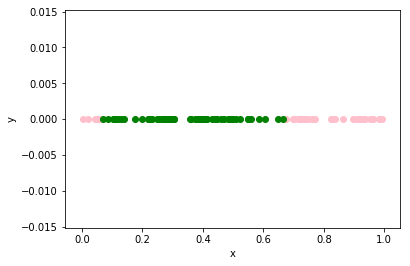

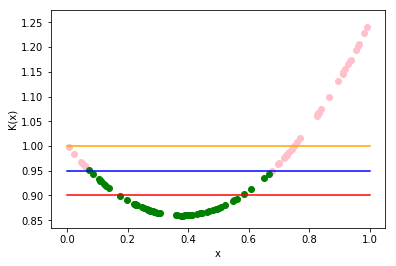

In [66]:
NPOINTS = 100
COLORS  = ['pink', "green"]

x = np.random.rand(NPOINTS)
y = np.ones(NPOINTS, dtype=int)
for i in range(NPOINTS):
    if x[i] < 0.0666 or x[i] > 0.666:
        y[i] = -1
        
plt.scatter(x[y==-1], np.zeros(len(x[y==-1])), color=COLORS[0])
plt.scatter(x[y== 1], np.zeros(len(x[y==1])), color=COLORS[1])
plt.xlabel('x');plt.ylabel('y')
plt.show()


a, b, c = 1, -.75, 1
feature = a*x**2 + b*x + c

colors = ['pink', "green"]

plt.scatter(x[y==-1], feature[y==-1], color=COLORS[0])
plt.scatter(x[y== 1], feature[y== 1], color=COLORS[1])
plt.xlabel('x')
plt.ylabel('K(x)')

height = 0.90
plt.plot([0,1], [height, height], color='red')
height = 0.95
plt.plot([0,1], [height, height], color='blue')
height = 1.00
plt.plot([0,1], [height, height], color='orange')

plt.show()


TODO: conclusion

## <a id="subsec23"></a> 2.3 Kernels

Now let's play with the kernels in scikit-learn. As before, we are going to use the sklearn.svm.SVC class in order to fit SVMs to some data models. The 'kernel' attribute of the class allows you to use different kernels for the used models.

Below are several data sets.

Click [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) for the documentation.

<div class="alert alert-warning">**Question 2.3.1**<br>
Find a good kernel for each one of the data set below and provide a measure of the accuracy.
</div>

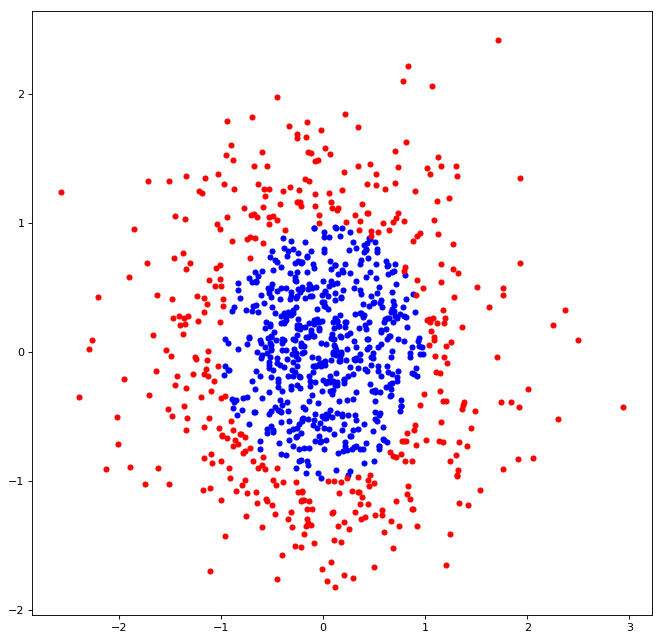

In [172]:
import csv
import numpy as np

def to_csv(name, mode, data):
    with open(name, mode) as csvfile:
        w = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        for d in data:
            w.writerow(d)
            
def gen_gauss(m, v, lab, nb):
    d = []
    for i in range(nb):
        d.append(np.concatenate((np.random.normal(loc=m, scale=v, size=2),[lab]),axis=0))
    return d
    
name = 'data2.csv'


n = 1000

d = gen_gauss([0, 0], 0.75, +1, n)
delete = []
for i in range(len(d)):
    if (d[i][0]**2 + d[i][1]**2 < 1):
        delete.append(i)
d = np.delete(d, delete, axis=0)
to_csv(name, 'w', d)


d = gen_gauss([0, 0], 0.75, -1, n)
delete = []
for i in range(len(d)):
    if (d[i][0]**2 + d[i][1]**2 > 1):
        delete.append(i)
d = np.delete(d, delete, axis=0)
to_csv(name, 'a', d)







plot_data("data2.csv")

# <a id="sec3"></a> 3. Application